<img src="../fasp/runner/credits/images/FullHouse.png" style="float: right;">

### SRA DRS server - identify specific file via Search

Compare this with the other version of FASPNotebook6 which unpacks a DRS bundle

In [4]:
#  IMPORTS
import sys
import datetime

# a utility 
from fasp.runner import FASPRunner

# The implementations we're using
from fasp.search import DiscoverySearchClient
from fasp.loc import SRADRSClient
from fasp.workflow import DNAStackWESClient

#https://search-presto-public.staging.dnastack.com/table/search_cloud.ncbi_sra.january2021/info
# Step 1 - Discovery
# query for relevant DRS objects
searchClient = DiscoverySearchClient('https://ga4gh-search-adapter-presto-public.prod.dnastack.com/')

query = '''SELECT f.sample_name, drs_id bam_drs_id, acc
FROM thousand_genomes.onek_genomes.ssd_drs s 
join thousand_genomes.onek_genomes.sra_drs_files f on f.sample_name = s.su_submitter_id 
where filetype = 'bam' and mapped = 'mapped' 
and sequencing_type ='exome' and  population = 'JPT' LIMIT 3'''

In [5]:
# Set up a client to access NCBI's  DRS Server for the Sequence Read Archive (SRA)
drsClient = SRADRSClient('https://locate.be-md.ncbi.nlm.nih.gov', 's3.us-east-1', public=True)

# Step 3 - set up a class that run a compute for us
wesClient = DNAStackWESClient('~/.keys/dnastack_wes_credentials.json')

# A log is helpful to keep track of the computes we've submitted
fasp_runner = FASPRunner()

fasp_runner.configure(searchClient, drsClient, wesClient)
fasp_runner.runQuery(query, 'SRA DRS 1k Genomes')


Running FASPNotebook06 - Direct identification of file.ipynb
Running query
SELECT f.sample_name, drs_id bam_drs_id, acc
FROM thousand_genomes.onek_genomes.ssd_drs s 
join thousand_genomes.onek_genomes.sra_drs_files f on f.sample_name = s.su_submitter_id 
where filetype = 'bam' and mapped = 'mapped' 
and sequencing_type ='exome' and  population = 'JPT' LIMIT 3
_Retrieving the query_
____Page1_______________
____Page2_______________
____Page3_______________
____Page4_______________
____Page5_______________
____Page6_______________
subject=NA18948, drsID=fb1cfb04d3ef99d07c21f9dbf87ccc68
workflow submitted, run:66807ca6-4f4f-46a8-9b00-0a2c48a0118d
____________________________________________________________
subject=NA18945, drsID=9327fb44eb81b49a41e38c8d86eb3b3a
workflow submitted, run:6fdbe621-0bb9-494b-a95d-bb039eac8a63
____________________________________________________________
subject=NA18943, drsID=9f38253b281c7e9c99e4bdbececd8e2f
workflow submitted, run:d01b30af-aae3-4ab7-9b15-ad575

[{'subject': 'NA18948', 'run_id': '66807ca6-4f4f-46a8-9b00-0a2c48a0118d'},
 {'subject': 'NA18945', 'run_id': '6fdbe621-0bb9-494b-a95d-bb039eac8a63'},
 {'subject': 'NA18943', 'run_id': 'd01b30af-aae3-4ab7-9b15-ad575934891b'}]

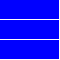

In [6]:
fasp_runner.getFASPicon()